In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
%matplotlib inline

In [4]:
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

['tessconfigs', 'configs', 'pdf.ttf', 'osd.traineddata', 'eng.traineddata']


In [ ]:
import shutil
src1 = 'ben.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src1, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

(600, 800, 3)


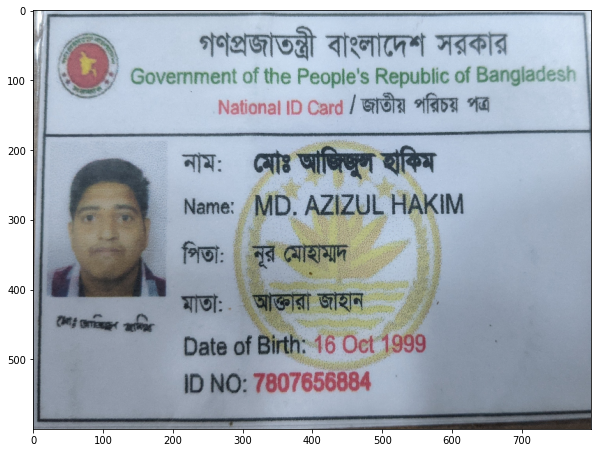

In [165]:
img2 = cv2.imread('PXL_20211003_043704460_2.jpg')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)
# img2= cv2.resize(img2,None, fx=.5, fy=0.5) #resizing the image
img2= cv2.resize(img2,(800,600))
print(img2.shape)
fig= plt.figure(figsize= [10,10])
plt.imshow(img2)

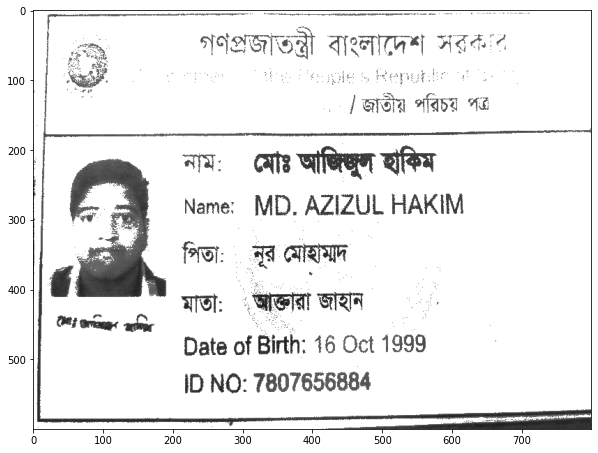

In [166]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)   # converting image to grayscale
gray[gray > 115] = 255
fig = plt.figure(figsize= [10,10])
# plt.imshow(gray,cmap='gray', vmin=0, vmax=255) 
plt.imshow(gray,cmap='gray', vmin=0, vmax=255) 

True

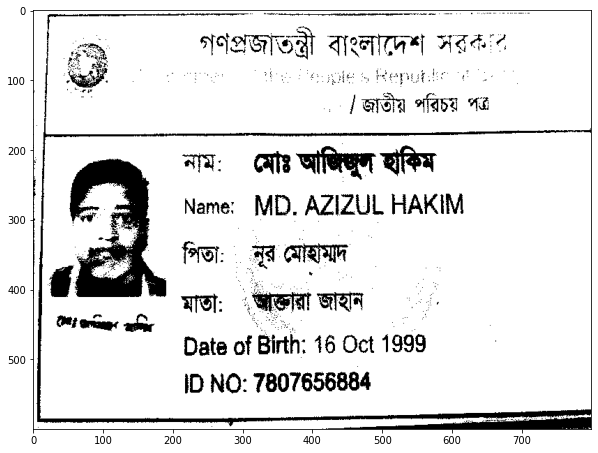

In [167]:
adaptive_threshold = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,85, 11 )
fig = plt.figure(figsize= [10,10])
plt.imshow(adaptive_threshold,cmap='gray', vmin=0, vmax=255)
cv2.imwrite("1.jpg", adaptive_threshold)

In [168]:
text3 = pytesseract.image_to_string(adaptive_threshold,lang='ben')
print(text3)

গণপ্রজাতন্ী বাং লাদেশ স সৰণ

Bi

আজঃ পরিচয় পর

 

  
  
 
     
 
 
 
 

Name: MD. AZIZUL HAKIM
Date of Birth: 16 Oct 1999
JD NO: 7807656884

  



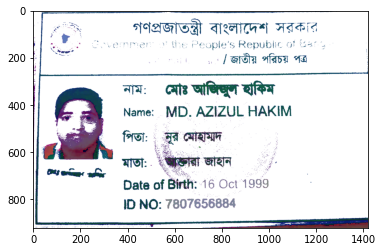

In [39]:
## tried to change hsv

img= cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)
img=np.copy(img)
light=np.where((img[:,:,1]<=100) & (img[:,:,2]>=130))
img[light]=(255,255,255)
plt.imshow(img)

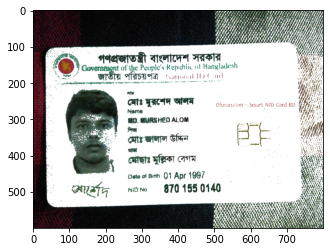

In [53]:
## tried to change rgb
img=np.copy(img2)
light=np.where((img[:,:,0]>=100) & (img[:,:,1]>=100) & (img[:,:,2]>=100))
# dark=np.where((img[:,:,0]<=150) & (img[:,:,1]<=150) & (img[:,:,2]<=150))

img[light]=(255,255,255)
plt.imshow(img)